Author : **Hajer SOUAIFI-AMARA**

Creation date : 07-FEB-2023

Final date : 09-FEB-2023

Modification date : 06-MAR-2023 - after first modelisation results, reintroducing IG blood cells from Barcelona dataset and recategorizing images using their labels (IG : IG, MY: MY, MMY and PMY: PMY)

# MyeLeuNet: Création du dataset

### Au final, 4 jeux de données vont être utilisées pour le projet:

- Barcelona data: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7182702/
- Kaggle data : https://www.kaggle.com/datasets/eugeneshenderov/acute-promyelocytic-leukemia-apl
- Raabin data : https://www.biorxiv.org/content/10.1101/2021.05.02.442287v4
- Munich data : https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=61080958

In [2]:
!pip install opencv-python
!pip install opencv-python numpy

### Chargement des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import seaborn as sns
import os
import zipfile
import rarfile
from pathlib import Path
#from PIL import Image, UnidentifiedImageError
import re
from tqdm import tqdm

import cv2
import csv

**Remarque**: La librairie OpenCV a été utilisé pour le chargement des images

#### Chemins à personnaliser

In [4]:
root_path = 'C:/Users/amara/Documents/Formation_DS_DataScientest/Projet_DS_DataScientest_BCC/Blood_Cells_Classification'
data_path = f'{root_path}/2-RawData'

## Barcelona data

In [5]:
# Pour les données Barcelona : 
# chemin vers le répertoire contenant les images
data_Barcelona_dir =  f'{data_path}/PBC_dataset_normal_DIB/'
images_extensions = ['.jpeg', '.jpg', '.png', '.gif', '.tiff', '.tif', 
    '.bmp', '.svg', '.webp', '.psd', '.ico', '.raw', '.heic', '.nef']

# ouvrir un fichier CSV pour écrire les informations sur les images
with open(f'{data_path}/Barcelona_image_files.csv', 'w', newline='') as csvfile:
    fieldnames = ["blood_cell", "img_id", "image_path", "source", "extension", "height", "width", "channels", "depth", 
                  "mean_luminance", "std_luminance"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # parcourir les dossiers et sous-dossiers
    for directory, subdirectories, filenames in os.walk(data_Barcelona_dir):
        for filename in filenames:
            # vérifier si le fichier est une image et qui ne commence pas par .DS
            if any(filename.endswith(ext) for ext in images_extensions) and not filename.startswith('.DS'):
                # lire l'image avec OpenCV
                image_path = os.path.join(directory, filename)
                image = cv2.imread(image_path)
                name, extension = os.path.splitext(filename)
                if image is None:
                    print(f"Impossible de lire l'image {image_path}")
                    continue
                height, width, channels = image.shape
                depth = image.dtype
                # Conversion to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
                # Calcul mean and std of luminance
                #mean_brightness = np.mean(img) #pas sûr que cela soit utile
                mean_luminance = np.mean(gray)
                std_luminance =  np.std(gray)
                
                #source des images
                source ='Barcelona'
                
                # écrire les informations sur l'image dans le CSV
                writer.writerow({
                    "blood_cell": os.path.basename(directory),
                    "img_id": name,
                    "image_path": image_path,
                    'source':source,
                    "extension": extension,
                    "height": height,
                    "width": width,
                    "channels": channels,
                    "depth": depth,
                    'mean_luminance': mean_luminance,
                    'std_luminance': std_luminance
                })


## Kaggle data

In [6]:
# Pour les données Kaggle : 
# chemin vers le répertoire contenant les images
data_Kaggle_APL_dir =  f'{data_path}/All/'
images_extensions = ['.jpeg', '.jpg', '.png', '.gif', '.tiff', '.tif', 
    '.bmp', '.svg', '.webp', '.psd', '.ico', '.raw', '.heic', '.nef']

# ouvrir un fichier CSV pour écrire les informations sur les images
with open(f'{data_path}/Kaggle_APL_image_files.csv', 'w', newline='') as csvfile:
    fieldnames = ["Patient_ID", "slide_type", "blood_cell", "img_id", 
                  "image_path", "source", "extension", "height", "width", "channels", "depth", "mean_luminance", "std_luminance"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # parcourir les dossiers et sous-dossiers
    for directory, subdirectories, filenames in os.walk(data_Kaggle_APL_dir):
        for filename in filenames:
            # vérifier si le fichier est une image et qui ne commence pas par .DS
            if any(filename.endswith(ext) for ext in images_extensions) and not filename.startswith('.DS'):
                # lire l'image avec OpenCV
                image_path = os.path.join(directory, filename) 
                name, extension = os.path.splitext(filename)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Impossible de lire l'image {image_path}")
                    continue
                height, width, channels = image.shape
                depth = image.dtype
                # Conversion to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Calcul mean and std of luminance
                #mean_brightness = np.mean(img) #pas sûr que cela soit utile
                mean_luminance = np.mean(gray)
                std_luminance =  np.std(gray)
   
                #source des images
                source ='Kaggle'
            
                # écrire les informations sur l'image dans le CSV
               
                if (os.path.basename(directory.split(os.path.sep)[-2]) == "Signed slides"):
                   
                    writer.writerow({'Patient_ID': os.path.basename(directory.split(os.path.sep)[-3]),
                                     'slide_type': os.path.basename(directory.split(os.path.sep)[-2]),
                                     'blood_cell' : os.path.basename(directory.split(os.path.sep)[-1]),
                                     'img_id': filename,
                                     'image_path': image_path,
                                     'source': source,
                                     'extension': extension,
                                     'height': height,
                                     'width': width,
                                     'channels': channels,
                                     'depth': depth, 
                                     'mean_luminance': mean_luminance,
                                     'std_luminance': std_luminance})

                else:
                    
                    writer.writerow({'Patient_ID': os.path.basename(directory.split(os.path.sep)[-2]),
                                     'slide_type': os.path.basename(directory.split(os.path.sep)[-1]),
                                     'blood_cell' : 'unsigned_slides',
                                     'img_id': name,
                                     'image_path': image_path,
                                     'source':source,
                                     'extension': extension,
                                     'height': height,
                                     'width': width,
                                     'channels': channels,
                                     'depth': depth,
                                     'mean_luminance': mean_luminance,
                                     'std_luminance': std_luminance})

Impossible de lire l'image C:/Users/amara/Documents/Formation_DS_DataScientest/Projet_DS_DataScientest_BCC/Blood_Cells_Classification/2-RawData/All/Patient_22\Unsigned slides\10027563503_130.jpg
Impossible de lire l'image C:/Users/amara/Documents/Formation_DS_DataScientest/Projet_DS_DataScientest_BCC/Blood_Cells_Classification/2-RawData/All/Patient_26\Unsigned slides\10027883368_121.jpg
Impossible de lire l'image C:/Users/amara/Documents/Formation_DS_DataScientest/Projet_DS_DataScientest_BCC/Blood_Cells_Classification/2-RawData/All/Patient_48\Unsigned slides\10026627597_066.jpg


**Remarque** : Certaines images sont corrompues

## Raabin data

In [7]:
# Pour les données Raabin - Train

# chemin vers le répertoire contenant les images
data_raabin_train_dir =  f'{data_path}/Raabin/Train'
images_extensions = ['.jpeg', '.jpg', '.png', '.gif', '.tiff', '.tif', 
    '.bmp', '.svg', '.webp', '.psd', '.ico', '.raw', '.heic', '.nef']

# ouvrir un fichier CSV pour écrire les informations sur les images
with open(f'{data_path}/Raabin_Train_image_files.csv', 'w', newline='') as csvfile:
    fieldnames = ["blood_cell", "img_id", "image_path", "source", "subsource", "extension", "height", "width", "channels", "depth", 
                  "mean_luminance", "std_luminance"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # parcourir les dossiers et sous-dossiers
    for directory, subdirectories, filenames in os.walk(data_raabin_train_dir):
        for filename in filenames:
            # vérifier si le fichier est une image et qui ne commence pas par .DS
            if any(filename.endswith(ext) for ext in images_extensions) and not filename.startswith('.DS'):
                # lire l'image avec OpenCV
                image_path = os.path.join(directory, filename)
                image = cv2.imread(image_path)
                name, extension = os.path.splitext(filename)
                if image is None:
                    print(f"Impossible de lire l'image {image_path}")
                    continue
                height, width, channels = image.shape
                depth = image.dtype
                # Conversion to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
                # Calcul mean and std of luminance
                #mean_brightness = np.mean(img) #pas sûr que cela soit utile
                mean_luminance = np.mean(gray)
                std_luminance =  np.std(gray)
                
                #source des images
                source ='Raabin'
                #subsource des images
                subsource ='Raabin_Train'
                
                # écrire les informations sur l'image dans le CSV
                writer.writerow({
                    "blood_cell": os.path.basename(directory),
                    "img_id": name,
                    "image_path": image_path,
                    "source":source,
                    "subsource": subsource,
                    "extension": extension,
                    "height": height,
                    "width": width,
                    "channels": channels,
                    "depth": depth,
                    'mean_luminance': mean_luminance,
                    'std_luminance': std_luminance
                })


In [8]:
# Pour les données Raabin - TestA

# chemin vers le répertoire contenant les images
data_raabin_testA_dir =  f'{data_path}/Raabin/TestA'
images_extensions = ['.jpeg', '.jpg', '.png', '.gif', '.tiff', '.tif', 
    '.bmp', '.svg', '.webp', '.psd', '.ico', '.raw', '.heic', '.nef']

# ouvrir un fichier CSV pour écrire les informations sur les images
with open(f'{data_path}/Raabin_TestA_image_files.csv', 'w', newline='') as csvfile:
    fieldnames = ["blood_cell", "img_id", "image_path", "source", "subsource", "extension", "height", "width", "channels", "depth", 
                  "mean_luminance", "std_luminance"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # parcourir les dossiers et sous-dossiers
    for directory, subdirectories, filenames in os.walk(data_raabin_testA_dir):
        for filename in filenames:
            # vérifier si le fichier est une image et qui ne commence pas par .DS
            if any(filename.endswith(ext) for ext in images_extensions) and not filename.startswith('.DS'):
                # lire l'image avec OpenCV
                image_path = os.path.join(directory, filename)
                image = cv2.imread(image_path)
                name, extension = os.path.splitext(filename)
                if image is None:
                    print(f"Impossible de lire l'image {image_path}")
                    continue
                height, width, channels = image.shape
                depth = image.dtype
                # Conversion to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
                # Calcul mean and std of luminance
                #mean_brightness = np.mean(img) #pas sûr que cela soit utile
                mean_luminance = np.mean(gray)
                std_luminance =  np.std(gray)
                
                #source des images
                source ='Raabin'
                #subsource des images
                subsource ='Raabin_TestA'
                
                # écrire les informations sur l'image dans le CSV
                writer.writerow({
                    "blood_cell": os.path.basename(directory),
                    "img_id": name,
                    "image_path": image_path,
                    "source":source,
                    "subsource": subsource,
                    "extension": extension,
                    "height": height,
                    "width": width,
                    "channels": channels,
                    "depth": depth,
                    'mean_luminance': mean_luminance,
                    'std_luminance': std_luminance
                })


In [9]:
# Pour les données Raabin - Test-B

# chemin vers le répertoire contenant les images
data_raabin_testB_dir =  f'{data_path}/Raabin/Test-B'
images_extensions = ['.jpeg', '.jpg', '.png', '.gif', '.tiff', '.tif', 
    '.bmp', '.svg', '.webp', '.psd', '.ico', '.raw', '.heic', '.nef']

# ouvrir un fichier CSV pour écrire les informations sur les images
with open(f'{data_path}/Raabin_TestB_image_files.csv', 'w', newline='') as csvfile:
    fieldnames = ["blood_cell", "img_id", "image_path", "source", "subsource", "extension", "height", "width", "channels", "depth", 
                  "mean_luminance", "std_luminance"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # parcourir les dossiers et sous-dossiers
    for directory, subdirectories, filenames in os.walk(data_raabin_testB_dir):
        for filename in filenames:
            # vérifier si le fichier est une image et qui ne commence pas par .DS
            if any(filename.endswith(ext) for ext in images_extensions) and not filename.startswith('.DS'):
                # lire l'image avec OpenCV
                image_path = os.path.join(directory, filename)
                image = cv2.imread(image_path)
                name, extension = os.path.splitext(filename)
                if image is None:
                    print(f"Impossible de lire l'image {image_path}")
                    continue
                height, width, channels = image.shape
                depth = image.dtype
                # Conversion to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
                # Calcul mean and std of luminance
                #mean_brightness = np.mean(img) #pas sûr que cela soit utile
                mean_luminance = np.mean(gray)
                std_luminance =  np.std(gray)
                
                #source des images
                source ='Raabin'
                #subsource des images
                subsource ='Raabin_TestB'
                
                # écrire les informations sur l'image dans le CSV
                writer.writerow({
                    "blood_cell": os.path.basename(directory),
                    "img_id": name,
                    "image_path": image_path,
                    "source":source,
                    "subsource": subsource,
                    "extension": extension,
                    "height": height,
                    "width": width,
                    "channels": channels,
                    "depth": depth,
                    'mean_luminance': mean_luminance,
                    'std_luminance': std_luminance
                })


## Munich data

In [10]:
# Pour les données Munich

# chemin vers le répertoire contenant les images
data_munich_dir =  f'{data_path}/Munich/PKG - AML-Cytomorphology/AML-Cytomorphology'
images_extensions = ['.jpeg', '.jpg', '.png', '.gif', '.tiff', '.tif', 
    '.bmp', '.svg', '.webp', '.psd', '.ico', '.raw', '.heic', '.nef']

# ouvrir un fichier CSV pour écrire les informations sur les images
with open(f'{data_path}/Munich_image_files.csv', 'w', newline='') as csvfile:
    fieldnames = ["blood_cell", "img_id", "image_path", "source", "subsource", "extension", "height", "width", "channels", "depth", 
                  "mean_luminance", "std_luminance"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # parcourir les dossiers et sous-dossiers
    for directory, subdirectories, filenames in os.walk(data_munich_dir):
        for filename in filenames:
            # vérifier si le fichier est une image et qui ne commence pas par .DS
            if any(filename.endswith(ext) for ext in images_extensions) and not filename.startswith('.DS'):
                # lire l'image avec OpenCV
                image_path = os.path.join(directory, filename)
                image = cv2.imread(image_path)
                name, extension = os.path.splitext(filename)
                if image is None:
                    print(f"Impossible de lire l'image {image_path}")
                    continue
                height, width, channels = image.shape
                depth = image.dtype
                # Conversion to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
                # Calcul mean and std of luminance
                #mean_brightness = np.mean(img) #pas sûr que cela soit utile
                mean_luminance = np.mean(gray)
                std_luminance =  np.std(gray)
                
                #source des images
                source ='Munich'

                
                # écrire les informations sur l'image dans le CSV
                writer.writerow({
                    "blood_cell": os.path.basename(directory),
                    "img_id": name,
                    "image_path": image_path,
                    "source":source,
                    "extension": extension,
                    "height": height,
                    "width": width,
                    "channels": channels,
                    "depth": depth,
                    'mean_luminance': mean_luminance,
                    'std_luminance': std_luminance
                })


### Kaggle + master.csv

In [11]:
kaggle = pd.read_csv(f'{data_path}/Kaggle_APL_image_files.csv')
kaggle.head()

,Patient_ID,slide_type,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance
0,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336348.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,195.145363,51.716442
1,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336349.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.915305,52.681653
2,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336361.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,187.748316,54.411011
3,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336369.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.612045,51.740058
4,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336376.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,198.821740,51.264017


In [12]:
# Kaggle: Join the table of images with the patients.csv
pat = pd.read_csv(f'{data_path}/master.csv')
# , index_col='Patient_ID'

kaggle_pat = kaggle.merge(pat, on='Patient_ID')
kaggle_pat.head()

,Patient_ID,slide_type,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,Diagnosis,Cohort,Age at Diagnosis,Gender
0,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336348.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,195.145363,51.716442,APL,Discovery,29,Female
1,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336349.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.915305,52.681653,APL,Discovery,29,Female
2,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336361.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,187.748316,54.411011,APL,Discovery,29,Female
3,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336369.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.612045,51.740058,APL,Discovery,29,Female
4,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336376.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,198.821740,51.264017,APL,Discovery,29,Female


## Kaggle & Barcelona : Re-classement des images mal classées

Lorsque l'on parcourt les dossiers des images, nous avons trouver des images labelisées qui n'étaient pas classées dans les bons dossiers (comme pour Kaggle) ou qui auraient pu être mises dans des dossiers plus spécifiques (comme pour Barcelone). En effet, pour la base de données de Barcelone, il y a des images classées dans un dossier IG mais seulement 151 images été labélisées comme tel, l'ensemble des autres images sont soit labelisées MY, MMY ou PMY. Ce sont des catégories qui apparaissent notamment dans les données Kaggle et Munich et qui nous intéressent particulièrement dans le cadre de notre projet.

La fonction **reclassify** va permettre de reclasser les images qui n'ont pas été mis dans les bons dossiers et donc qui ne sont pas correctement labellisées.

In [13]:
#Fonction pour reclasser les images mal classées

def reclassify(df, column):
    df['bad_class'] = 0 #pour flagger les images mal classées et les supprimées ensuite car feront doublons
    for i in range(len(df)):
        name = df.at[i, column]
        prefix = name.split("_")[0].upper()
        if prefix == 'ART':
            if (df.at[i, 'blood_cell'] == 'Arifact'):
                df.at[i, 'bad_class'] = 0 # classé correctement
            else:
                df.at[i, 'bad_class'] = 1 # classé incorrectement
                df.at[i, 'blood_cell'] = 'Arifact'
        if prefix == 'BA':
            if (df.at[i, 'blood_cell'] == 'Basophil'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Basophil'
        if prefix == 'BL':
            if (df.at[i, 'blood_cell'] == 'Blast, no lineage spec'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Blast, no lineage spec' 
        if prefix == 'BNE':
            if (df.at[i, 'blood_cell'] == 'Band neutrophils'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Band neutrophils'                 
        if prefix == 'EO':
            if (df.at[i, 'blood_cell'] == 'Eosinophils'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Eosinophils'    
        if prefix == 'ERB':
            if (df.at[i, 'blood_cell'] == 'Erythroblast'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Erythroblast' 
        if prefix == 'GT':
            if (df.at[i, 'blood_cell'] == 'Giant thrombocyt'):
                df.at[i, 'bad_class'] = 1
            else:
                df.at[i, 'bad_class'] = 0
                df.at[i, 'blood_cell'] = 'Giant thrombocyte' 
        if prefix == 'IG':
            if (df.at[i, 'blood_cell'] == 'ig'):
                df.at[i, 'bad_class'] = 0 # classé correctement
            else:
                df.at[i, 'bad_class'] = 1 # classé incorrectement
                df.at[i, 'blood_cell'] = 'ig'
        if prefix == 'LY':
            if (df.at[i, 'blood_cell'] == 'Lymphocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Lymphocyte' 
        if prefix == 'VLY':
            if (df.at[i, 'blood_cell'] == 'Lymphocyte, variant'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Lymphocyte, variant' 
        if prefix == 'MMY':
            if (df.at[i, 'blood_cell'] == 'Metamyelocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Metamyelocyte' 
        if prefix == 'MO':
            if (df.at[i, 'blood_cell'] == 'Monocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Monocyte' 
        if prefix == 'MY':
            if (df.at[i, 'blood_cell'] == 'Myelocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Myelocyte' 
        if prefix == 'PC':
            if (df.at[i, 'blood_cell'] == 'Plasma cells'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Plasma cells'            
        if prefix == 'PLY':
            if (df.at[i, 'blood_cell'] == 'Prolymphocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Prolymphocyte'            
        if prefix == 'PMO':
            if (df.at[i, 'blood_cell'] == 'Promonocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Promonocyte'            
        if prefix == 'PMY':
            if (df.at[i, 'blood_cell'] == 'Promyelocyte'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Promyelocyte'            
        if prefix == 'SNE':
            if (df.at[i, 'blood_cell'] == 'Segmented neutrophils'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Segmented neutrophils'            
        if prefix == 'SMU':
            if (df.at[i, 'blood_cell'] == 'Smudge cells'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Smudge cells'            
        if prefix == 'ERC':
            if (df.at[i, 'blood_cell'] == 'Thrombocyte aggregation'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Thrombocyte aggregation'   
        if prefix == 'UI':
            if (df.at[i, 'blood_cell'] == 'Unidentified'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Unidentified'            
        if prefix == 'YUI':
            if (df.at[i, 'blood_cell'] == 'Young Unidentified'):
                df.at[i, 'bad_class'] = 0
            else:
                df.at[i, 'bad_class'] = 1
                df.at[i, 'blood_cell'] = 'Young Unidentified'            

    return df


#### Kaggle : Re-classement des images mal classées

In [14]:
kaggle_pat = reclassify(kaggle_pat, 'img_id')

In [15]:
kaggle_pat

,Patient_ID,slide_type,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,Diagnosis,Cohort,Age at Diagnosis,Gender,bad_class
0,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336348.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,195.145363,51.716442,APL,Discovery,29,Female,0
1,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336349.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.915305,52.681653,APL,Discovery,29,Female,0
2,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336361.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,187.748316,54.411011,APL,Discovery,29,Female,0
3,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336369.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.612045,51.740058,APL,Discovery,29,Female,0
4,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336376.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,198.821740,51.264017,APL,Discovery,29,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,Patient_99,Unsigned slides,unsigned_slides,10028001812_278,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,212.850373,40.222281,AML,Validation,61,Male,0
25717,Patient_99,Unsigned slides,unsigned_slides,10028001812_279,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,203.389886,41.699868,AML,Validation,61,Male,0
25718,Patient_99,Unsigned slides,unsigned_slides,10028001812_280,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,207.323486,41.285987,AML,Validation,61,Male,0
25719,Patient_99,Unsigned slides,unsigned_slides,10028001812_281,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,213.305038,39.092321,AML,Validation,61,Male,0


In [16]:
# Nombre d'images mal classées (pour lesquelles bad_class = 1), tient aussi compte du reclassement des images Unsigned
#kaggle_pat[kaggle_pat['bad_class']==1].groupby(sum()
nb_badclass = (kaggle_pat['bad_class'] == 1).sum()
nb_badclass

187

Il y avait donc 187 images qui étaient mal classées dans la base de données Kaggle.

In [17]:
# Sélectionnez les lignes avec la valeur "Unsigned" dans la colonne "slide_type"
unsigned_kaggle_pat = kaggle_pat[kaggle_pat['slide_type'] == 'Unsigned slides']

# Sélectionnez les lignes avec la valeur "Signed" dans la colonne "slide_type" et la valeur "0" dans la colonne "bad_class"
signed_kaggle_pat = kaggle_pat[(kaggle_pat['slide_type'] == 'Signed slides') & (kaggle_pat['bad_class'] == 0)]

# Concaténez les deux dataframes sélectionnés
kaggle_pat = pd.concat([signed_kaggle_pat, unsigned_kaggle_pat], axis=0)

In [18]:
kaggle_pat

,Patient_ID,slide_type,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,Diagnosis,Cohort,Age at Diagnosis,Gender,bad_class
0,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336348.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,195.145363,51.716442,APL,Discovery,29,Female,0
1,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336349.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.915305,52.681653,APL,Discovery,29,Female,0
2,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336361.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,187.748316,54.411011,APL,Discovery,29,Female,0
3,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336369.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,189.612045,51.740058,APL,Discovery,29,Female,0
4,Patient_00,Signed slides,"Blast, no lineage spec",BL_15336376.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,198.821740,51.264017,APL,Discovery,29,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,Patient_99,Unsigned slides,unsigned_slides,10028001812_278,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,212.850373,40.222281,AML,Validation,61,Male,0
25717,Patient_99,Unsigned slides,unsigned_slides,10028001812_279,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,203.389886,41.699868,AML,Validation,61,Male,0
25718,Patient_99,Unsigned slides,unsigned_slides,10028001812_280,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,207.323486,41.285987,AML,Validation,61,Male,0
25719,Patient_99,Unsigned slides,unsigned_slides,10028001812_281,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,213.305038,39.092321,AML,Validation,61,Male,0


In [19]:
kaggle_pat.to_csv(f'{data_path}/Kaggle_Patients_images_files.csv')

#### Barcelona : Re-classement des images mal classées dans ig (il y a des MY, MMY, PMY)

In [21]:
barcelona = pd.read_csv(f'{data_path}/Barcelona_image_files.csv')
barcelona.head()

,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance
0,basophil,BA_100102,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,201.010843,44.261303
1,basophil,BA_101381,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,194.197834,48.559934
2,basophil,BA_101611,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,193.350826,47.330852
3,basophil,BA_102039,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,188.760063,49.704802
4,basophil,BA_102750,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,203.143595,44.392421


In [22]:
barcelona = reclassify(barcelona, 'img_id')

In [23]:
barcelona.to_csv(f'{data_path}/Barcelona_image_files.csv')

# Merge of all tables

In [24]:
barcelona = pd.read_csv(f'{data_path}/Barcelona_image_files.csv')
barcelona.head()

,Unnamed: 0,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,bad_class
0,0,Basophil,BA_100102,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,201.010843,44.261303,1
1,1,Basophil,BA_101381,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,194.197834,48.559934,1
2,2,Basophil,BA_101611,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,193.350826,47.330852,1
3,3,Basophil,BA_102039,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,188.760063,49.704802,1
4,4,Basophil,BA_102750,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,203.143595,44.392421,1


In [25]:
raabin_train = pd.read_csv(f'{data_path}/Raabin_Train_image_files.csv')
raabin_train.head()

,blood_cell,img_id,image_path,source,subsource,extension,height,width,channels,depth,mean_luminance,std_luminance
0,Basophil,20190526_162951_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_Train,.jpg,575,575,3,uint8,140.062152,31.695898
1,Basophil,20190526_163414_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_Train,.jpg,575,575,3,uint8,127.909199,34.440574
2,Basophil,20190526_163446_1,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_Train,.jpg,575,575,3,uint8,135.610828,35.993755
3,Basophil,20190526_163519_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_Train,.jpg,575,575,3,uint8,132.243203,37.325463
4,Basophil,20190526_163532_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_Train,.jpg,575,575,3,uint8,127.747805,35.051432


In [26]:
raabin_testA= pd.read_csv(f'{data_path}/Raabin_TestA_image_files.csv')
raabin_testA.head()

,blood_cell,img_id,image_path,source,subsource,extension,height,width,channels,depth,mean_luminance,std_luminance
0,Basophil,20190526_163027_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestA,.jpg,575,575,3,uint8,128.198947,31.482635
1,Basophil,20190526_163055_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestA,.jpg,575,575,3,uint8,116.461801,40.563327
2,Basophil,20190526_163055_1,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestA,.jpg,575,575,3,uint8,115.581771,39.886553
3,Basophil,20190526_163055_2,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestA,.jpg,575,575,3,uint8,115.030382,37.898782
4,Basophil,20190526_163545_0,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestA,.jpg,575,575,3,uint8,126.363025,36.394605


In [27]:
raabin_testB = pd.read_csv(f'{data_path}/Raabin_TestB_image_files.csv')
raabin_testB.head()

,blood_cell,img_id,image_path,source,subsource,extension,height,width,channels,depth,mean_luminance,std_luminance
0,Lymphocyte,1004,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestB,.jpg,493,486,3,uint8,191.654187,31.567740
1,Lymphocyte,1013,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestB,.jpg,486,488,3,uint8,140.020880,23.740889
2,Lymphocyte,1025,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestB,.jpg,493,493,3,uint8,139.197306,22.266377
3,Lymphocyte,107,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestB,.jpg,488,490,3,uint8,142.879107,24.498464
4,Lymphocyte,1147,C:/Users/amara/Documents/Formation_DS_DataScie...,Raabin,Raabin_TestB,.jpg,495,495,3,uint8,143.872527,24.650053


In [28]:
munich  = pd.read_csv(f'{data_path}/Munich_image_files.csv')
munich.head()

,blood_cell,img_id,image_path,source,subsource,extension,height,width,channels,depth,mean_luminance,std_luminance
0,BAS,BAS_0001,C:/Users/amara/Documents/Formation_DS_DataScie...,Munich,NaN,.tiff,400,400,3,uint8,186.536219,50.148466
1,BAS,BAS_0002,C:/Users/amara/Documents/Formation_DS_DataScie...,Munich,NaN,.tiff,400,400,3,uint8,159.338831,85.110329
2,BAS,BAS_0003,C:/Users/amara/Documents/Formation_DS_DataScie...,Munich,NaN,.tiff,400,400,3,uint8,211.228138,43.397897
3,BAS,BAS_0004,C:/Users/amara/Documents/Formation_DS_DataScie...,Munich,NaN,.tiff,400,400,3,uint8,189.074675,55.505390
4,BAS,BAS_0005,C:/Users/amara/Documents/Formation_DS_DataScie...,Munich,NaN,.tiff,400,400,3,uint8,183.197369,57.654694


In [29]:
datasets = [barcelona, raabin_train, raabin_testA, raabin_testB, munich, kaggle_pat]
img_df = pd.concat(datasets)

In [30]:
img_df

,Unnamed: 0,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,bad_class,subsource,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender
0,0.0,Basophil,BA_100102,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,201.010843,44.261303,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Basophil,BA_101381,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,194.197834,48.559934,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Basophil,BA_101611,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,193.350826,47.330852,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Basophil,BA_102039,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,188.760063,49.704802,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Basophil,BA_102750,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,203.143595,44.392421,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,NaN,unsigned_slides,10028001812_278,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,212.850373,40.222281,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male
25717,NaN,unsigned_slides,10028001812_279,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,203.389886,41.699868,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male
25718,NaN,unsigned_slides,10028001812_280,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,207.323486,41.285987,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male
25719,NaN,unsigned_slides,10028001812_281,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,213.305038,39.092321,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male


### Recherche d'images corrompues

In [31]:
# Index des images corrompues
corrupted_images_index = []

for i, row in img_df.iterrows():
    try:
        image = cv2.imread(row['image_path'])
        if image is None:
            raise Exception("File is corrupted")
    except Exception as e:
        print(f"Error in image: {row['image_path']}, error message: {e}")
        corrupted_images_index.append(i)

# Suppression des images corrompues du dataframe
img_df = img_df.drop(corrupted_images_index, axis=0)

In [32]:
img_df

,Unnamed: 0,blood_cell,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,bad_class,subsource,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender
0,0.0,Basophil,BA_100102,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,201.010843,44.261303,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Basophil,BA_101381,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,194.197834,48.559934,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Basophil,BA_101611,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,193.350826,47.330852,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Basophil,BA_102039,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,188.760063,49.704802,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Basophil,BA_102750,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,203.143595,44.392421,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,NaN,unsigned_slides,10028001812_278,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,212.850373,40.222281,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male
25717,NaN,unsigned_slides,10028001812_279,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,203.389886,41.699868,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male
25718,NaN,unsigned_slides,10028001812_280,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,207.323486,41.285987,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male
25719,NaN,unsigned_slides,10028001812_281,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,213.305038,39.092321,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male


**Remarque** : L'ouverture des fichiers avec la fonction imread de OpenCV ne semble détecter aucune images corrompues...

In [33]:
img_df.to_csv(f'{data_path}/BCC_dataset.csv')

In [34]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77757 entries, 0 to 25720
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17092 non-null  float64
 1   blood_cell        77757 non-null  object 
 2   img_id            77757 non-null  object 
 3   image_path        77757 non-null  object 
 4   source            77757 non-null  object 
 5   extension         77757 non-null  object 
 6   height            77757 non-null  int64  
 7   width             77757 non-null  int64  
 8   channels          77757 non-null  int64  
 9   depth             77757 non-null  object 
 10  mean_luminance    77757 non-null  float64
 11  std_luminance     77757 non-null  float64
 12  bad_class         42759 non-null  float64
 13  subsource         16633 non-null  object 
 14  Patient_ID        25667 non-null  object 
 15  slide_type        25667 non-null  object 
 16  Diagnosis         25667 non-null  object

## Répartition des images suivant le type cellulaire

In [35]:
# Tableau croisé pour le Barcelona dataset
crosstabl = pd.crosstab(index=barcelona['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0                  source  pourcentage
blood_cell                                
Band neutrophils         1633     9.554177
Basophil                 1218     7.126141
Eosinophils              3117    18.236602
Erythroblast             1551     9.074421
Lymphocyte               1214     7.102738
Metamyelocyte            1015     5.938451
Monocyte                 1420     8.307980
Myelocyte                1137     6.652235
Promyelocyte              592     3.463609
Segmented neutrophils    1646     9.630236
ig                        151     0.883454
neutrophil                 50     0.292535
platelet                 2348    13.737421


In [36]:
# Tableau croisé pour le Kaggle
crosstabl = pd.crosstab(index=kaggle['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0                    source  pourcentage
blood_cell                                  
Arifact                      25     0.097197
Band neutrophils            171     0.664826
Basophil                     53     0.206057
Blast, no lineage spec     3310    12.868862
Eosinophils                 108     0.419890
Erythroblast                521     2.025582
Giant thrombocyte            66     0.256600
Lymphocyte                 3435    13.354846
Lymphocyte, variant         471     1.831189
Metamyelocyte                78     0.303254
Monocyte                   1319     5.128105
Myelocyte                   181     0.703705
Plasma cells                 58     0.225497
Prolymphocyte                 1     0.003888
Promonocyte                  71     0.276039
Promyelocyte                688     2.674857
Segmented neutrophils      2092     8.133432
Smudge cells               2931    11.395358
Thrombocyte aggregation      22     0.085533
Unidentified                 24     0.093309
Young Unid

In [37]:
# Tableau croisé pour le Raabin Train
crosstabl = pd.crosstab(index=raabin_train['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0       source  pourcentage
blood_cell                     
Basophil       212     2.083538
Eosinophil     744     7.312039
Lymphocyte    2427    23.852580
Monocyte       561     5.513514
Neutrophil    6231    61.238329


In [38]:
# Tableau croisé pour le Raabin TestA
crosstabl = pd.crosstab(index=raabin_testA['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0       source  pourcentage
blood_cell                     
Basophil        89     2.051164
Eosinophil     322     7.421065
Lymphocyte    1034    23.830376
Monocyte       234     5.392948
Neutrophil    2660    61.304448


In [39]:
# Tableau croisé pour le Raabin Test B
crosstabl = pd.crosstab(index=raabin_testB['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0       source  pourcentage
blood_cell                     
Lymphocyte     148     6.984427
Neutrophil    1971    93.015573


In [284]:
# Tableau croisé pour le Munich
crosstabl = pd.crosstab(index=munich['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0       source  pourcentage
blood_cell                     
BAS             79     0.430166
EBO             78     0.424721
EOS            424     2.308739
KSC             15     0.081677
LYA             11     0.059897
LYT           3937    21.437517
MMZ             15     0.081677
MOB             26     0.141574
MON           1789     9.741356
MYB             42     0.228696
MYO           3268    17.794718
NGB            109     0.593520
NGS           8484    46.196570
PMB             18     0.098013
PMO             70     0.381160


### For the whole dataset

In [40]:
# Renaming 'blood_cell'

img_df = img_df.rename({'blood_cell':'blood_cell_original'}, axis =1)
img_df.head()

,Unnamed: 0,blood_cell_original,img_id,image_path,source,extension,height,width,channels,depth,mean_luminance,std_luminance,bad_class,subsource,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender
0,0.0,Basophil,BA_100102,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,201.010843,44.261303,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Basophil,BA_101381,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,194.197834,48.559934,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Basophil,BA_101611,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,193.350826,47.330852,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Basophil,BA_102039,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,188.760063,49.704802,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Basophil,BA_102750,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,203.143595,44.392421,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Tableau croisé
crosstabl = pd.crosstab(index=img_df['blood_cell_original'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0                    source  pourcentage
blood_cell_original                         
Arifact                      25     0.032151
BAS                          79     0.101599
Band neutrophils           1804     2.320048
Basophil                   1572     2.021683
Blast, no lineage spec     3327     4.278714
EBO                          78     0.100313
EOS                         424     0.545289
Eosinophil                 1066     1.370938
Eosinophils                3225     4.147537
Erythroblast               2077     2.671142
Giant thrombocyte            66     0.084880
KSC                          15     0.019291
LYA                          11     0.014147
LYT                        3937     5.063210
Lymphocyte                 8289    10.660133
Lymphocyte, variant         473     0.608305
MMZ                          15     0.019291
MOB                          26     0.033438
MON                        1789     2.300757
MYB                          42     0.054014
MYO       

# Catégorisation des types de cellules sanguines

In [42]:
### Re-categorizing cell types

dic_subcat = pd.read_excel(f'{data_path}/dic_subcat2.xlsx')

# convert the dataframe into a dictionary
data_dict = dic_subcat.set_index('cell_type')['cell_subcategory'].to_dict()

# print the dictionary
print(data_dict)

img_df['cell_category'] = img_df['blood_cell_original'].map(data_dict)

{'BAS': 'basophil', 'EBO': 'erythrocyte', 'EOS': 'eosinophil', 'KSC': 'artifact', 'LYA': 'lymphocyte', 'LYT': 'lymphocyte', 'MMZ': 'metamyelocyte', 'MOB': 'monocyte', 'MON': 'monocyte', 'MYB': 'myelocyte', 'MYO': 'myeloblast', 'NGB': 'neutrophil', 'NGS': 'neutrophil', 'PMB': 'promyelocyte', 'PMO': 'promyelocyte', 'Basophil': 'basophil', 'Eosinophil': 'eosinophil', 'Lymphocyte': 'lymphocyte', 'Monocyte': 'monocyte', 'Neutrophil': 'neutrophil', 'basophil': 'basophil', 'eosinophil': 'eosinophil', 'erythroblast': 'erythrocyte', 'ig': 'immature_granulocyte', 'lymphocyte': 'lymphocyte', 'monocyte': 'monocyte', 'neutrophil': 'neutrophil', 'platelet': 'platelet', 'Arifact': 'artifact', 'Band neutrophils': 'neutrophil', 'Blast, no lineage spec': 'myeloblast', 'Eosinophils': 'eosinophil', 'Erythroblast': 'erythrocyte', 'Giant thrombocyte': 'platelet', 'Lymphocyte, variant': 'lymphocyte', 'Metamyelocyte': 'metamyelocyte', 'Myelocyte': 'myelocyte', 'Plasma cells': 'lymphocyte', 'Prolymphocyte': 'l

In [43]:
### Adding an abbreviation column

abv = pd.read_excel(f'{data_path}/dic_abbreviations.xlsx')

# convert the excel file into a dictionary
abv = abv.set_index('cell_category')['abbreviation'].to_dict()

print(abv)

img_df['blood_cell'] = img_df['cell_category'].map(abv)

{'lymphocyte': 'LYM', 'neutrophil': 'NEU', 'eosinophil': 'EOS', 'basophil': 'BAS', 'monocyte': 'MON', 'erythrocyte': 'ERY', 'platelet': 'PLT', 'myeloblast': 'MYB', 'myelocyte': 'MYC', 'promyelocyte': 'PYC', 'metamyelocyte': 'MMC', 'artifact': 'ART', 'immature_granulocyte': 'IG', 'unknown_precursor': 'UNP', 'unsigned': 'UNS'}


#### Note: UNP and UNS have been indexed but shall be removed of further analyses

In [44]:
# Tableau croisé
crosstabl = pd.crosstab(index=img_df['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0       source  pourcentage
blood_cell                     
ART           3007     3.867176
BAS           1651     2.123282
EOS           4715     6.063763
ERY           2155     2.771455
IG             151     0.194195
LYM          12769    16.421673
MMC           1105     1.421094
MON           5415     6.964003
MYB           6595     8.481552
MYC           1360     1.749039
NEU          25089    32.265905
PLT           2436     3.132837
PYC           1346     1.731034
UNP              7     0.009002
UNS           9956    12.803992


### Investigation sur les duplicates

In [45]:
duplicates = img_df[img_df.duplicated(subset='img_id', keep=False)]
duplicates

,Unnamed: 0,blood_cell_original,img_id,image_path,source,extension,height,width,channels,depth,...,bad_class,subsource,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender,cell_category,blood_cell


**Remarque**: Tous les doublons se trouvaient dans la table Kaggle car beaucoup d'images étaient mal clasées (187) parmi les Signed. 

In [292]:
## Table des doublons:
#duplicates.to_csv(f'{data_path}/BCC_duplicates.csv')

In [46]:
img_df

,Unnamed: 0,blood_cell_original,img_id,image_path,source,extension,height,width,channels,depth,...,bad_class,subsource,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender,cell_category,blood_cell
0,0.0,Basophil,BA_100102,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS
1,1.0,Basophil,BA_101381,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS
2,2.0,Basophil,BA_101611,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS
3,3.0,Basophil,BA_102039,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS
4,4.0,Basophil,BA_102750,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25716,NaN,unsigned_slides,10028001812_278,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,...,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male,unsigned,UNS
25717,NaN,unsigned_slides,10028001812_279,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,...,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male,unsigned,UNS
25718,NaN,unsigned_slides,10028001812_280,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,...,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male,unsigned,UNS
25719,NaN,unsigned_slides,10028001812_281,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,365,360,3,uint8,...,0.0,NaN,Patient_99,Unsigned slides,AML,Validation,61.0,Male,unsigned,UNS


## Fichier .csv du dataset 'final' pour l'EDA

In [47]:
img_df.to_csv(f'{data_path}/BCC_dataset_final.csv')

# Analyse exploratoire de vérification

In [48]:
# Tableau croisé
crosstabl = pd.crosstab(index=img_df['blood_cell'], columns='source')

# Ajout de la colonne de pourcentage
crosstabl['pourcentage'] = 100 * crosstabl / crosstabl.sum()

print(crosstabl)

col_0       source  pourcentage
blood_cell                     
ART           3007     3.867176
BAS           1651     2.123282
EOS           4715     6.063763
ERY           2155     2.771455
IG             151     0.194195
LYM          12769    16.421673
MMC           1105     1.421094
MON           5415     6.964003
MYB           6595     8.481552
MYC           1360     1.749039
NEU          25089    32.265905
PLT           2436     3.132837
PYC           1346     1.731034
UNP              7     0.009002
UNS           9956    12.803992


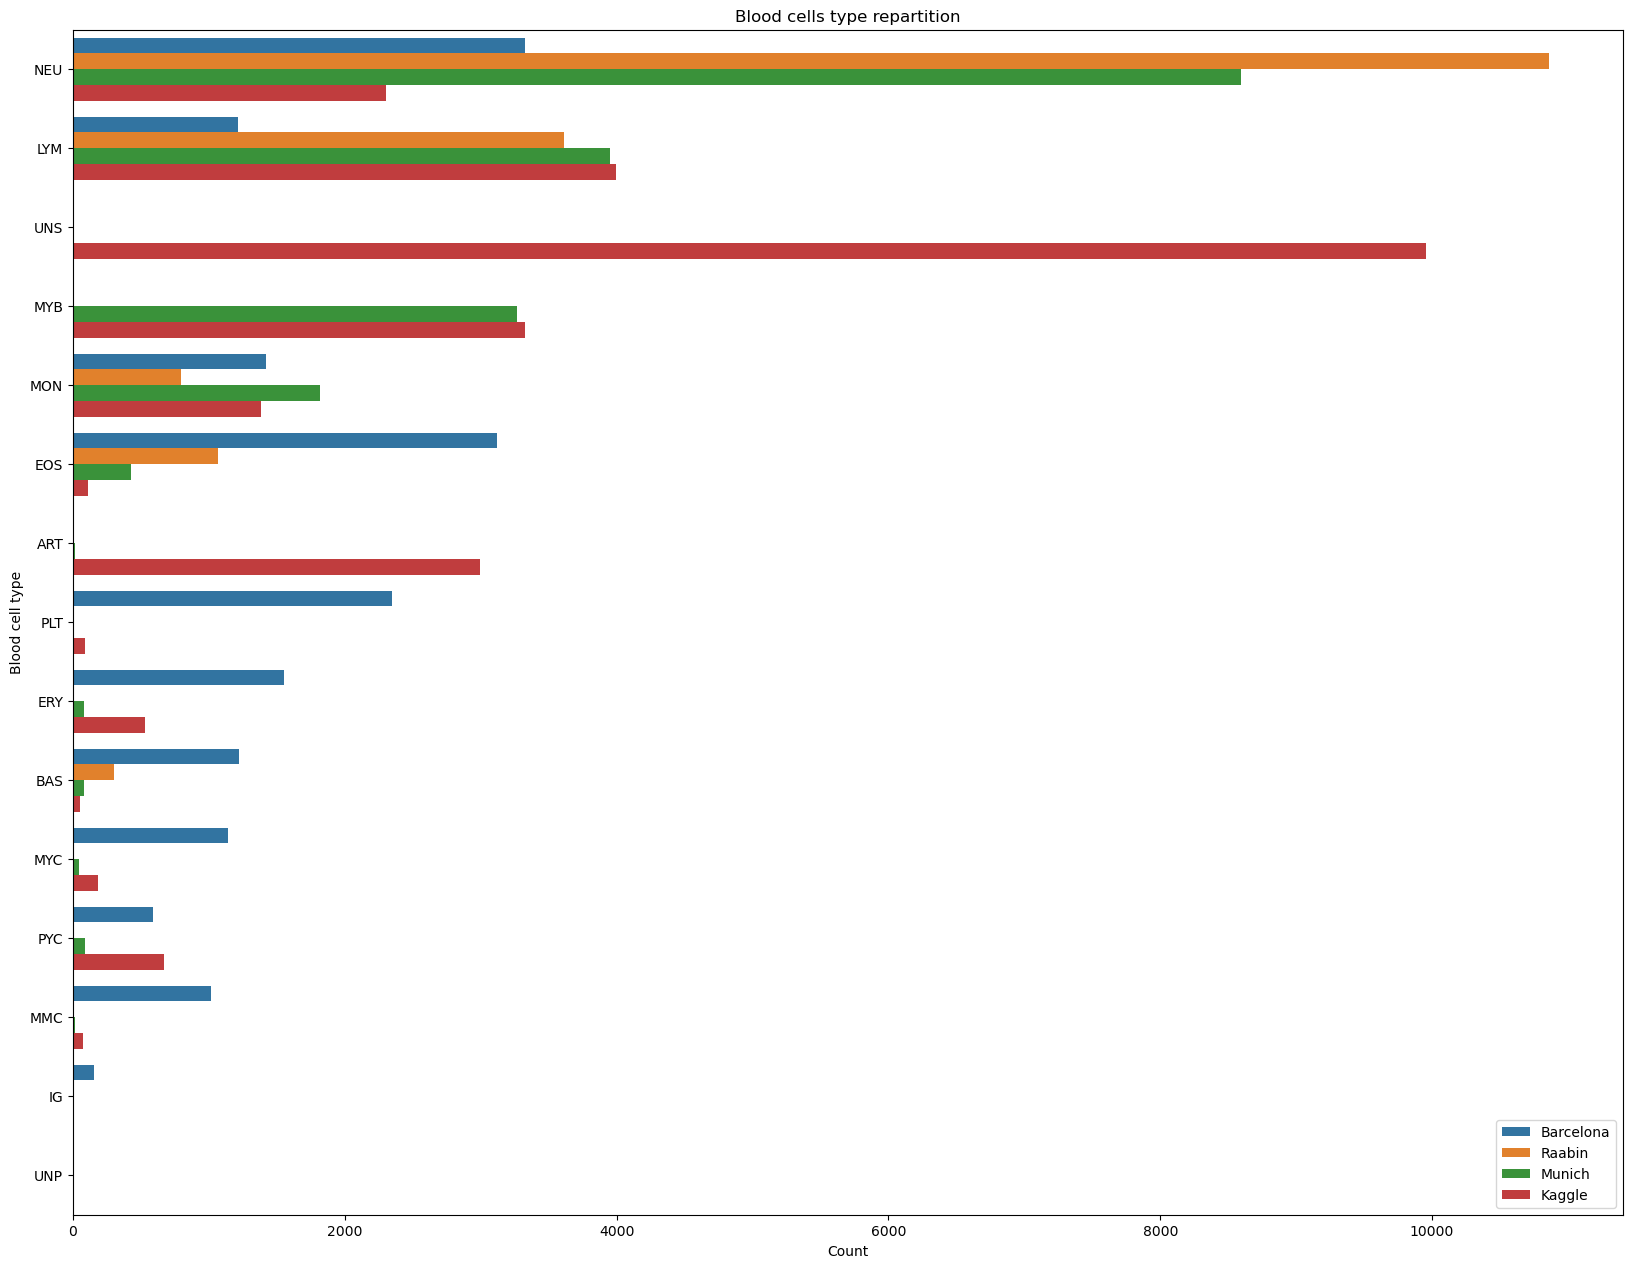

In [49]:
# Barplot
#sns.countplot(data=img_df, y='blood_cell', hue='kaggle', orient='h', order = img_df['blood_cell'].value_counts().index)
#plt.ylabel("Blood cell type")
#plt.xlabel("Count")
#plt.title('Blood cells type repartition')
#plt.show();

import matplotlib.patches as mpatches

plt.figure(figsize=(20,15))
sns.countplot(data=img_df, y='blood_cell', hue='source', 
          order = img_df['blood_cell'].value_counts().index, orient='h')
plt.ylabel("Blood cell type")
plt.xlabel("Count")

# Personnalisation de la légende
#handles, labels = g.get_legend_handles_labels()

# Modification des couleurs
#colors = ['orange', 'green']
#patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

#plt.legend(handles=patches, labels=labels, loc='lower center', ncol=2) 
plt.legend(loc='lower right',)
plt.title('Blood cells type repartition')
plt.subplots_adjust(top=0.9) # Pour écarter le title
plt.show();

In [51]:
img_df.loc[(img_df['source'] == 'Kaggle') &  (img_df['blood_cell_original'] == 'Basophil')].head()

,Unnamed: 0,blood_cell_original,img_id,image_path,source,extension,height,width,channels,depth,...,bad_class,subsource,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender,cell_category,blood_cell
401,NaN,Basophil,BA_5899689.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,...,0.0,NaN,Patient_02,Signed slides,AML,Discovery,29.0,Female,basophil,BAS
527,NaN,Basophil,BA_14661274.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,...,0.0,NaN,Patient_03,Signed slides,AML,Discovery,32.0,Female,basophil,BAS
528,NaN,Basophil,BA_14661320.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,...,0.0,NaN,Patient_03,Signed slides,AML,Discovery,32.0,Female,basophil,BAS
529,NaN,Basophil,BA_14661372.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,...,0.0,NaN,Patient_03,Signed slides,AML,Discovery,32.0,Female,basophil,BAS
1090,NaN,Basophil,BA_9285129.jpg,C:/Users/amara/Documents/Formation_DS_DataScie...,Kaggle,.jpg,363,360,3,uint8,...,0.0,NaN,Patient_07,Signed slides,AML,Discovery,62.0,Male,basophil,BAS
